# Assignment: Unsupervised Machine Learning \ Genetic Algorithms

In this assignment you will experience with Genetic Algorithms (GAs), starting from a basic implementation, continuing with dedicated improvements, and later applying it in various unsupervised machine learning scenarios.

## Part 1: Time Series of 'Likes' Influenced by Personalization

Various personalization algorithms are applied in e-commerce and other kinds of websites/apps in order to increase purchases or user engagement.

The following time series were collected over a period of 20 months from a large online retail store. In this study, during the first 10 months (normalized as the period from month -10 to month 0) a contextual personalization algorithm was applied in order to increase user engagement (measured as the accumulated number of 'Likes' on products shared via Facebook). As in the case with many contextual approaches, this algorithm suffered from the 'filter bubble' problem (https://en.wikipedia.org/wiki/Filter_bubble), and therefore reached a plateau quite quickly.

Nonetheless, this step enabled a more advanced collaborative filtering algorithm to analyze the collected data, learn, and increase user engagement once it was applied in the following 10 months. A classic inflection point was detected after the transition to the new algorithm. A domain expert envisioned the inflection dynamics will behave similarly to the formula f(x) = ax^3 + bx^2 + cx + d. The values of a, b, c and d were found to be 4.8, 12.1, 53.2 and 6219, respectively.

<< Please note: This function is an analytical solution, used here for simplifying the actual study, where a dynamic model was created with ODEs >>

We are given a sample sparse data of users from 10 different European countries. In this project, we will implement a simple GA in order to fit our data to the above-mentioned function, and discover the parameters for a, b, c and d. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read measured data from an Excel file

In [ ]:
xlsx = pd.ExcelFile('European Measurements.xlsx')
sheet1 = xlsx.parse(3) # Note the other datasets in the file.
variables = ["Month","Avg. Likes"]
data = sheet1.loc[:, variables].values
print(data)

[[-9.70000000e+00  1.93303385e+03]
 [-9.10000000e+00  3.07678202e+03]
 [-7.70000000e+00  4.61959427e+03]
 [-7.30000000e+00  4.87640388e+03]
 [-7.20000000e+00  5.27621777e+03]
 [-6.20000000e+00  5.76967851e+03]
 [-4.70000000e+00  5.26728526e+03]
 [-4.10000000e+00  6.40777934e+03]
 [-3.30000000e+00  6.05631612e+03]
 [-2.70000000e+00  6.10216500e+03]
 [-2.50000000e+00  5.18359545e+03]
 [-2.30000000e+00  7.03041233e+03]
 [-1.90000000e+00  5.69790109e+03]
 [-1.80000000e+00  5.42920417e+03]
 [-1.20000000e+00  5.23662184e+03]
 [-9.00000000e-01  6.28278124e+03]
 [-1.00000000e-01  6.53285159e+03]
 [ 2.00000000e-01  5.78284515e+03]
 [ 3.00000000e-01  6.57445814e+03]
 [ 4.00000000e-01  5.25761264e+03]
 [ 1.10000000e+00  5.86568880e+03]
 [ 1.50000000e+00  6.92127198e+03]
 [ 1.60000000e+00  6.15982519e+03]
 [ 2.10000000e+00  6.87265063e+03]
 [ 2.20000000e+00  5.57408399e+03]
 [ 2.50000000e+00  5.88485867e+03]
 [ 5.20000000e+00  6.75130936e+03]
 [ 5.40000000e+00  7.32399792e+03]
 [ 5.90000000e+00  7

### Simple GA mechanism

In [ ]:
def fitness_function(data, pop):
    fitness = []
    for solution in range(len(pop)):
        for event in range(len(data)):
            error = 0;
            event_time = data[event][0]
            event_measured = data[event][1]
            event_expected = pop[solution][0]*event_time**3 + pop[solution][1]*event_time**2 + pop[solution][2]*event_time + pop[solution][3]
            error +=(event_expected - event_measured)**2
        fitness.append(1/error) # We use 1/error in order to use a maximization mechanism, while we want to minimize the error
    return fitness

def biased_selection(pop, fitness, num_parents):
    sorted_fitness_args = np.argsort(fitness)
    return pop[sorted_fitness_args[-num_parents:],:]
    # parents = np.empty((num_parents, pop.shape[1]))
    # for parent_num in range(num_parents):
    #     max_fitness_idx = np.where(fitness == np.max(fitness))
    #     max_fitness_idx = max_fitness_idx[0][0]
    #     parents[parent_num, :] = pop[max_fitness_idx, :]
    #     fitness[max_fitness_idx] = -99999999999
    # return parents

def recombination(parents, offspring_size):
    offspring = np.empty(offspring_size)
    recombination_point = np.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:recombination_point] = parents[parent1_idx, 0:recombination_point]
        offspring[k, recombination_point:] = parents[parent2_idx, recombination_point:]
    return offspring

def mutation(offspring_recombination):
    for idx in range(offspring_recombination.shape[0]):
        random_value = np.random.randint(-100, 100, 1)
        random_index = np.random.randint(0,offspring_recombination.shape[1],1)
        offspring_recombination[idx, random_index] = offspring_recombination[idx, random_index] + random_value
    return offspring_recombination


### GA application for fitting time series data

The population of the first generation: 
[[5164 8427 2923 2442]
 [3610 4369 7991 8205]
 [6761 3415 4060 7427]
 ...
 [9035 8211 6328 5471]
 [2141 4342 4603 7729]
 [3145 6765 2089 5932]]

Evolution:
Generation =  0 	Best fitness =  45960625449.69576
Generation =  1 	Best fitness =  11475159059.19463
Generation =  2 	Best fitness =  11475159059.19463
Generation =  3 	Best fitness =  10739885502.6041
Generation =  4 	Best fitness =  10051499905.8799
Generation =  5 	Best fitness =  7947418296.42157
Generation =  6 	Best fitness =  4702022340.30592
Generation =  7 	Best fitness =  1428720467.58374
Generation =  8 	Best fitness =  617829129.91532
Generation =  9 	Best fitness =  36244387.15187
Generation =  10 	Best fitness =  5848325.54954
Generation =  11 	Best fitness =  95145.19628
Generation =  12 	Best fitness =  95145.19628
Generation =  13 	Best fitness =  44803.70219
Generation =  14 	Best fitness =  44803.70219
Generation =  15 	Best fitness =  44803.70219
Generation =  16 	Best fi

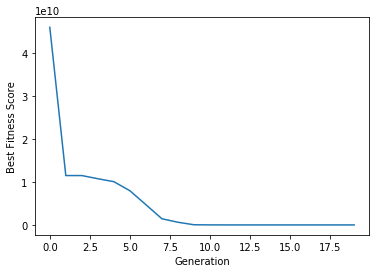

In [ ]:
# GA Parameters
formula_degree = 4
number_of_solutions = 500
number_of_parents = 250
population_size = (number_of_solutions,formula_degree) 
number_of_generations = 20
best_outputs = []

# Genesis
new_population = np.random.randint(low=0, high=10000, size=population_size)
print("The population of the first generation: ")
print(new_population)

# Evolution
print ("\nEvolution:")
for generation in range(number_of_generations):

    fitness = fitness_function(data, new_population)
    print("Generation = ", generation, "\tBest fitness = ", round(1/np.max(fitness),5))
    # best_outputs.append(np.max(np.sum(new_population*formula_degree, axis=1)))
    best_outputs.append(round(1/np.max(fitness),5))
    parents = biased_selection(new_population, fitness, number_of_parents)
    offspring_recombination = recombination(parents, offspring_size=(population_size[0]-parents.shape[0], formula_degree))
    offspring_mutation = mutation(offspring_recombination)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Results
print("\nThe population of the last generation: ")
print(new_population)
fitness = fitness_function(data, new_population)
best_match_idx = np.where(fitness == np.max(fitness))
print("Best solution: ", new_population[best_match_idx, :])

# Chart
plt.plot(best_outputs)
plt.xlabel("Generation")
plt.ylabel("Best Fitness Score")
plt.show()

## Challenge 231 (_max score - 50 points_)
Implement a new and improved GA, based on the one above, by taking the following actions:

1. Make the bias_selection function give more chances to solutions with better fitness values, but not necesseraly take the best ones, as currently done.
2. Make the recombination function make real random recombination along the chromosome and between chromosomes
3. Change the mutation rate and/or scale to better avoid local minima while keeping evolution time short
4. Apply a smarter stopping criterion
5. Consider different GA parameters in order to reach better results

In [ ]:
# Your code here

## Part 2: Solving Different Problems With the Same GA

Below is a reminder of the K-Means algorithm you implemented in HW1.

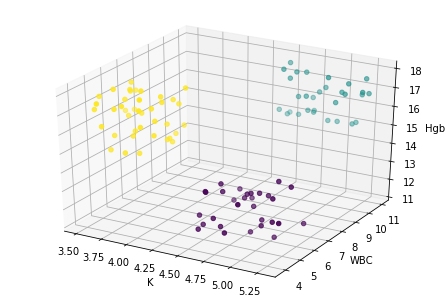

In [ ]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

xlsx = pd.ExcelFile('EMR-Blood.xlsx')
sheet1 = xlsx.parse(0)
sheet1.set_index("Key", inplace=True)

variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

y_pred_KMeans1 = KMeans(n_clusters=3).fit_predict(EMR3d1)

def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 232 (_max score - 50 points_)
Solve the same clustering problem with a GA **without assuming K** (no iteration over differnet Ks), by trying to minimize the intra-cluster distances and maximize the inter-cluster distances.

**hint: You can build the population as the cluster assignment of each point or as cluster centers (consider coordinates boundaries)

In [ ]:
# Your code here

## Challenge 233: Reconstruct Image (Bonus: _max score - 20 points_)
In this part you will attemp to generate an image which is closest to a target image given. 

First we will load the image from a file:


In [ ]:
import matplotlib.image as mpimg

img=mpimg.imread('pexels-photo-57905.jpeg')

For simplicity (and running time), we focus on a small part of the image:

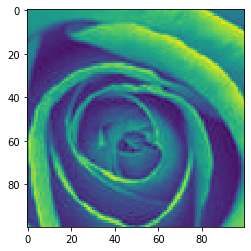

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(img[100:200,200:300,0])

And we will define this part as out target image to reconstruct:

In [ ]:
target = img[100:200,200:300,0]

Your mission is to generate an image starting at random noise. The goal is to get an image as close as possible to the target. Don;t worry if it's still noisy...
FYI: GA are not the best solution for these types of problems ;)
You can use these blog posts to give you ideas:
https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6

https://heartbeat.fritz.ai/reproducing-images-using-a-genetic-algorithm-with-python-91fc701ff84

In [ ]:
# Your code here